#### Imports

In [1]:
from tifffile import TiffFile
import cv2
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft
from scipy.signal import find_peaks

from tqdm import tqdm
from sklearn.cluster import KMeans
import os
import sys

In [2]:
sys.path.append(r'C:\Users\97254\Desktop\git\FluoroVision\src')

In [3]:
from utils.common_utils import xywh_to_x1y1x2y2
from post_process.fluorophore_intensity import get_fluoro_intensity

#### Functions

In [4]:
def extract_frame_number(filename):
    """Extract the frame number from a filename like 'frame_0013.png'."""
    match = re.search(r'frame_(\d+)\.png', filename)
    if match:
        return int(match.group(1))
    else:
        raise ValueError(f"Filename {filename} does not match the expected pattern.")

#### Inputs

In [5]:
video_path = r'C:\Users\97254\Desktop\Resources\Technion\exploratory_resaerach\data\AB3C.tif'
annotation_path = r'C:\Users\97254\Desktop\Resources\Technion\exploratory_resaerach\data\AB3C_gt_new_format.csv'

In [6]:
df = pd.read_csv(annotation_path)

In [7]:
df['frame_number'] = df['frame'].apply(extract_frame_number)

0it [00:00, ?it/s]

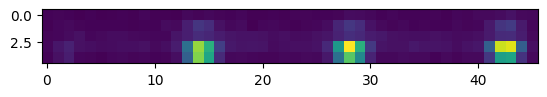

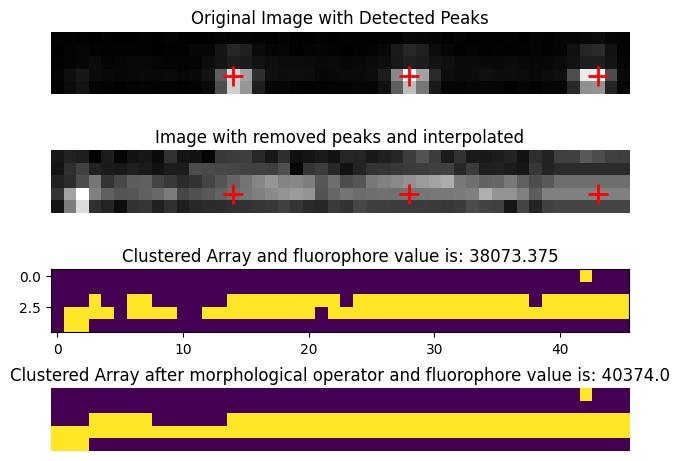

1it [00:00,  3.39it/s]

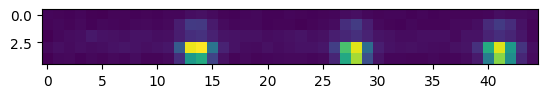

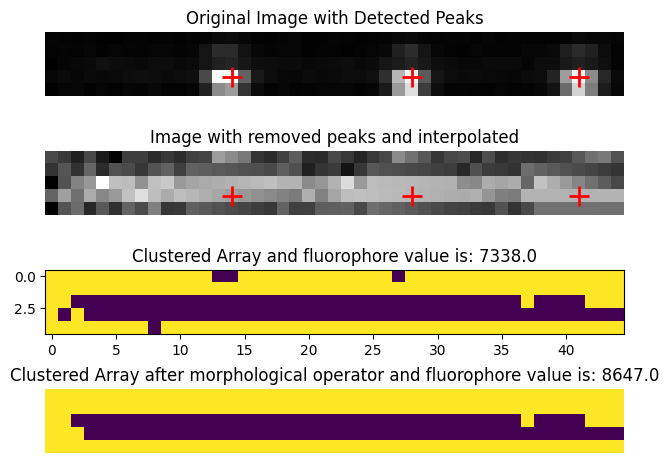

1it [00:00,  1.90it/s]


In [8]:
with TiffFile(video_path) as tif:
      intensity1_list, intensity2_list = [], []
      for i, page in tqdm(enumerate(tif.pages)):
        frame = page.asarray()
        frame_df = df.loc[df['frame_number'] == i+1]
        box_list = []
        for index, row in frame_df.iterrows():
            box_list.append([row['x_center'], row['y_center'], row['width'], row['height']])
        for box in box_list:
            x1, y1, x2, y2 = xywh_to_x1y1x2y2(box, frame.shape[1], frame.shape[0])
            if x2 - x1 < 30:
                continue
            bead = frame[y1:y2, x1:x2]
            plt.imshow(bead, cmap='viridis')
            plt.show()
            fluoro_intesity1, fluoro_intesity2 = get_fluoro_intensity(bead, num_peaks=3, min_distance=10, peak_radius=3, plot=True)
        if i == 1:
            break